# Time Series 01

In [7]:
rm(list=ls()) 
library(zoo)
library(dynlm)
library(forecast)

ERROR: Error in library(forecast): there is no package called 'forecast'


In [8]:
#####################################################################
###   Exmaple: CPI from US-FRED quarterly and seasonal adjusted
###            "CPIAUCSL"

cpi=read.csv("cpi.csv")
y = cpi[,2]
y = ts(y,start=c(1947,1),freq=4)     # defining as TS

In [9]:
par(mfrow=c(2,2))
ts.plot(y)
Acf(y,lag.max=40)
z = 400*diff(log(y))                 # US-cpi inflation (400= 100%*4Q) yearly
ts.plot(z,col=2)             
abline(h=0,lty=3)
abline(v=c(1984,1),lty=2)            # Note: there is a structural break in 1984Q1 
Acf(z,lag.max=40,plot=F)    

ERROR: Error in Acf(y, lag.max = 40): konnte Funktion "Acf" nicht finden


ERROR: Error in Acf(z, lag.max = 40, plot = F): konnte Funktion "Acf" nicht finden


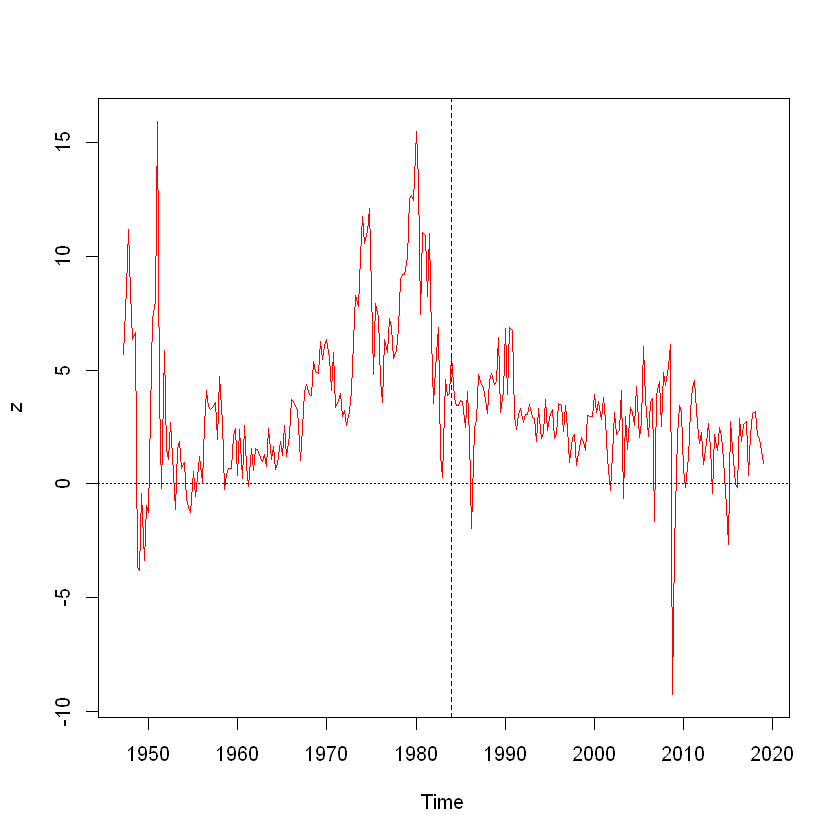

In [10]:
z = 400*diff(log(y))                 # US-cpi inflation (400= 100%*4Q) yearly
ts.plot(z,col=2)             
abline(h=0,lty=3)
abline(v=c(1984,1),lty=2)            # Note: there is a structural break in 1984Q1 
Acf(z,lag.max=40,plot=F)             # access the ACF directly

### AR(1) - Auto-regressive Regression model order 1
ar1.mod = dynlm(z ~ L(z,1))
summary(ar1.mod)
# red line => theoretical ACF of AR(1)
lags = seq(1:41)-1
round(ar1.mod$coef[2]^lags,3)
par(mfrow=c(1,1))
plot(Acf(z,lag.max=40,plot=F))
lines(ar1.mod$coef[2]^lags,col=2)
# AR(2)
ar2.mod = dynlm(z ~ L(z,c(1,2)))
summary(ar2.mod)

### Split the sample since we observe a structural break in the data 
#   Idea: before 1984Q1 high Variance, after 1984Q1 less Variance
#   Note: we still estimate with OLS, hence assume homoskecasticity

In [11]:
par(mfrow=c(2,2))
ts.plot(z)                        # ignore 2008Q4 for a moment
z1 = window(z,c(1947,2),c(1983,4))
z2 = window(z,c(1984,1),c(2019,1))
plot(Acf(z,lag.max=40,plot=F))
plot(Acf(z1,lag.max=40,plot=F))
plot(Acf(z2,lag.max=40,plot=F))
# compare means and sd
c(mean(z1),mean(z2))
c(sd(z1),sd(z2))
# compare densities
par(mfrow=c(1,1))
plot(density(z1),xlim=c(-10,20),ylim=c(0,0.3))
abline(v=0,lty=2)
lines(density(z2),xlim=c(-10,20),col=4)

ERROR: Error in Acf(z, lag.max = 40, plot = F): konnte Funktion "Acf" nicht finden
